In [1]:
import random
import pandas as pd
import random

In [2]:
df = pd.DataFrame(columns=['f1', 'f2', 'f3','t'])

In [3]:
target = [10,11]

In [27]:
for i in range(1,500):
    f1= random.randint(1,999)
    f2 = random.randint(1000,9999)
    random_target = random.choice(target)
    f3 = (f1+f2)+random_target
    new_entry = {"f1":f1,"f2":f2,"f3":-f3,"t":random_target}
#     df.append(new_entry, ignore_index=True)
    df.loc[len(df)]=new_entry

    
df.to_csv('init_1.csv', index=False)

In [30]:
df.head()
# df.shape

,f1,f2,f3,t
0,475,7403,-7889,11
1,346,4840,-5196,10
2,723,1194,-1928,11
3,903,2467,-3380,10
4,840,4600,-5451,11


In [29]:
X = df.drop('t',axis=1)
y = df['t']
print(X)
print(y)

       f1    f2    f3
0     475  7403 -7889
1     346  4840 -5196
2     723  1194 -1928
3     903  2467 -3380
4     840  4600 -5451
...   ...   ...   ...
2989  187  7566 -7764
2990   90  6020 -6120
2991  891  2344 -3246
2992  152  8586 -8748
2993  580  1960 -2551

[2994 rows x 3 columns]
0       11
1       10
2       11
3       10
4       11
        ..
2989    11
2990    10
2991    11
2992    10
2993    11
Name: t, Length: 2994, dtype: int64


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42
                                                )

In [37]:
print(y_test.shape)

(899,)


In [34]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [35]:
y_pred = model.predict(X_test)
print("real",y_test)
print("pred",y_pred)

real 2366    10
1088    10
321     10
1037    10
1503    11
        ..
1747    11
858     10
2019    10
48      10
719     11
Name: t, Length: 899, dtype: int64
pred [10 10 11 11 11 11 11 11 11 10 10 10 10 10 11 11 11 10 10 10 11 10 10 11
 10 10 11 10 10 10 11 11 11 11 10 10 11 10 11 11 10 11 10 10 10 11 11 11
 11 10 11 11 11 10 10 11 11 10 10 10 11 11 11 10 10 10 10 11 11 11 11 11
 10 10 10 10 10 10 10 11 11 10 11 10 10 11 11 10 10 10 11 10 10 10 10 11
 11 10 10 11 11 10 11 10 10 10 11 10 10 10 11 11 10 10 11 11 10 10 11 10
 11 10 11 10 10 10 11 11 11 10 10 10 11 10 10 11 11 10 10 11 11 11 11 10
 11 10 11 11 11 10 11 11 11 11 10 10 11 10 11 10 11 10 11 11 11 10 11 11
 10 10 11 11 10 10 10 10 10 10 11 10 11 10 10 11 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 11 11 11 11 10 11 11 10 11 10 10 11 10 11 10 10
 11 11 11 11 10 11 10 11 11 10 10 10 10 10 11 11 11 11 11 10 10 11 11 11
 10 11 10 10 11 11 10 11 10 10 10 11 11 11 10 10 11 10 10 10 10 10 11 11
 10 11 11 11 11 11 11 11 10 10 

In [38]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.5038932146829811


In [39]:
cm =confusion_matrix(y_test,y_pred)

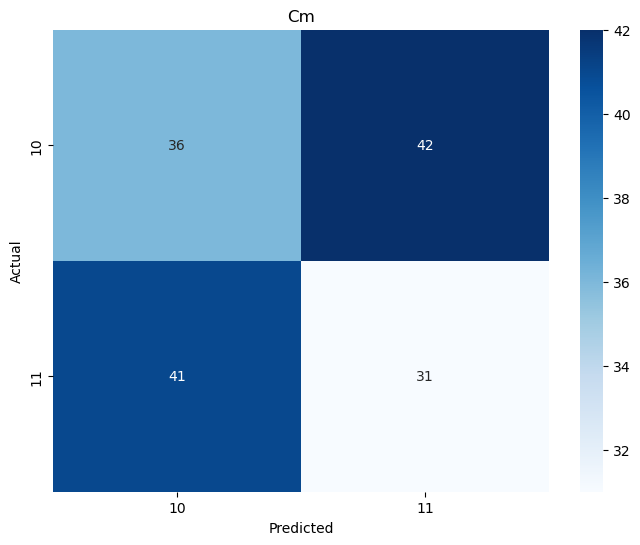

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap="Blues",xticklabels=model.classes_,yticklabels=model.classes_)
plt.title("Cm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [15]:
t = sns.lmplot(data=df,x="X_train",y="y_train",hue="species",height=5)
# t.set_axis_labels("abc x","abc y")

KeyError: "None of [Index(['X_train', 'species', 'y_train'], dtype='object')] are in the [columns]"

# LinearRegression

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [41]:
model2 = LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [42]:
li_pred = model.predict(X_test)
print(li_pred)

[10 10 11 11 11 11 11 11 11 10 10 10 10 10 11 11 11 10 10 10 11 10 10 11
 10 10 11 10 10 10 11 11 11 11 10 10 11 10 11 11 10 11 10 10 10 11 11 11
 11 10 11 11 11 10 10 11 11 10 10 10 11 11 11 10 10 10 10 11 11 11 11 11
 10 10 10 10 10 10 10 11 11 10 11 10 10 11 11 10 10 10 11 10 10 10 10 11
 11 10 10 11 11 10 11 10 10 10 11 10 10 10 11 11 10 10 11 11 10 10 11 10
 11 10 11 10 10 10 11 11 11 10 10 10 11 10 10 11 11 10 10 11 11 11 11 10
 11 10 11 11 11 10 11 11 11 11 10 10 11 10 11 10 11 10 11 11 11 10 11 11
 10 10 11 11 10 10 10 10 10 10 11 10 11 10 10 11 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 11 11 11 11 10 11 11 10 11 10 10 11 10 11 10 10
 11 11 11 11 10 11 10 11 11 10 10 10 10 10 11 11 11 11 11 10 10 11 11 11
 10 11 10 10 11 11 10 11 10 10 10 11 11 11 10 10 11 10 10 10 10 10 11 11
 10 11 11 11 11 11 11 11 10 10 10 10 11 10 11 11 10 10 10 10 10 10 11 10
 10 11 11 10 10 10 11 11 11 11 11 11 11 11 10 11 10 10 11 11 11 11 10 10
 11 10 10 10 11 10 11 11 10 10 11 10 11 11 11 11 11

In [43]:
mse = mean_squared_error(y_test,li_pred)
print(mse)

0.4961067853170189
